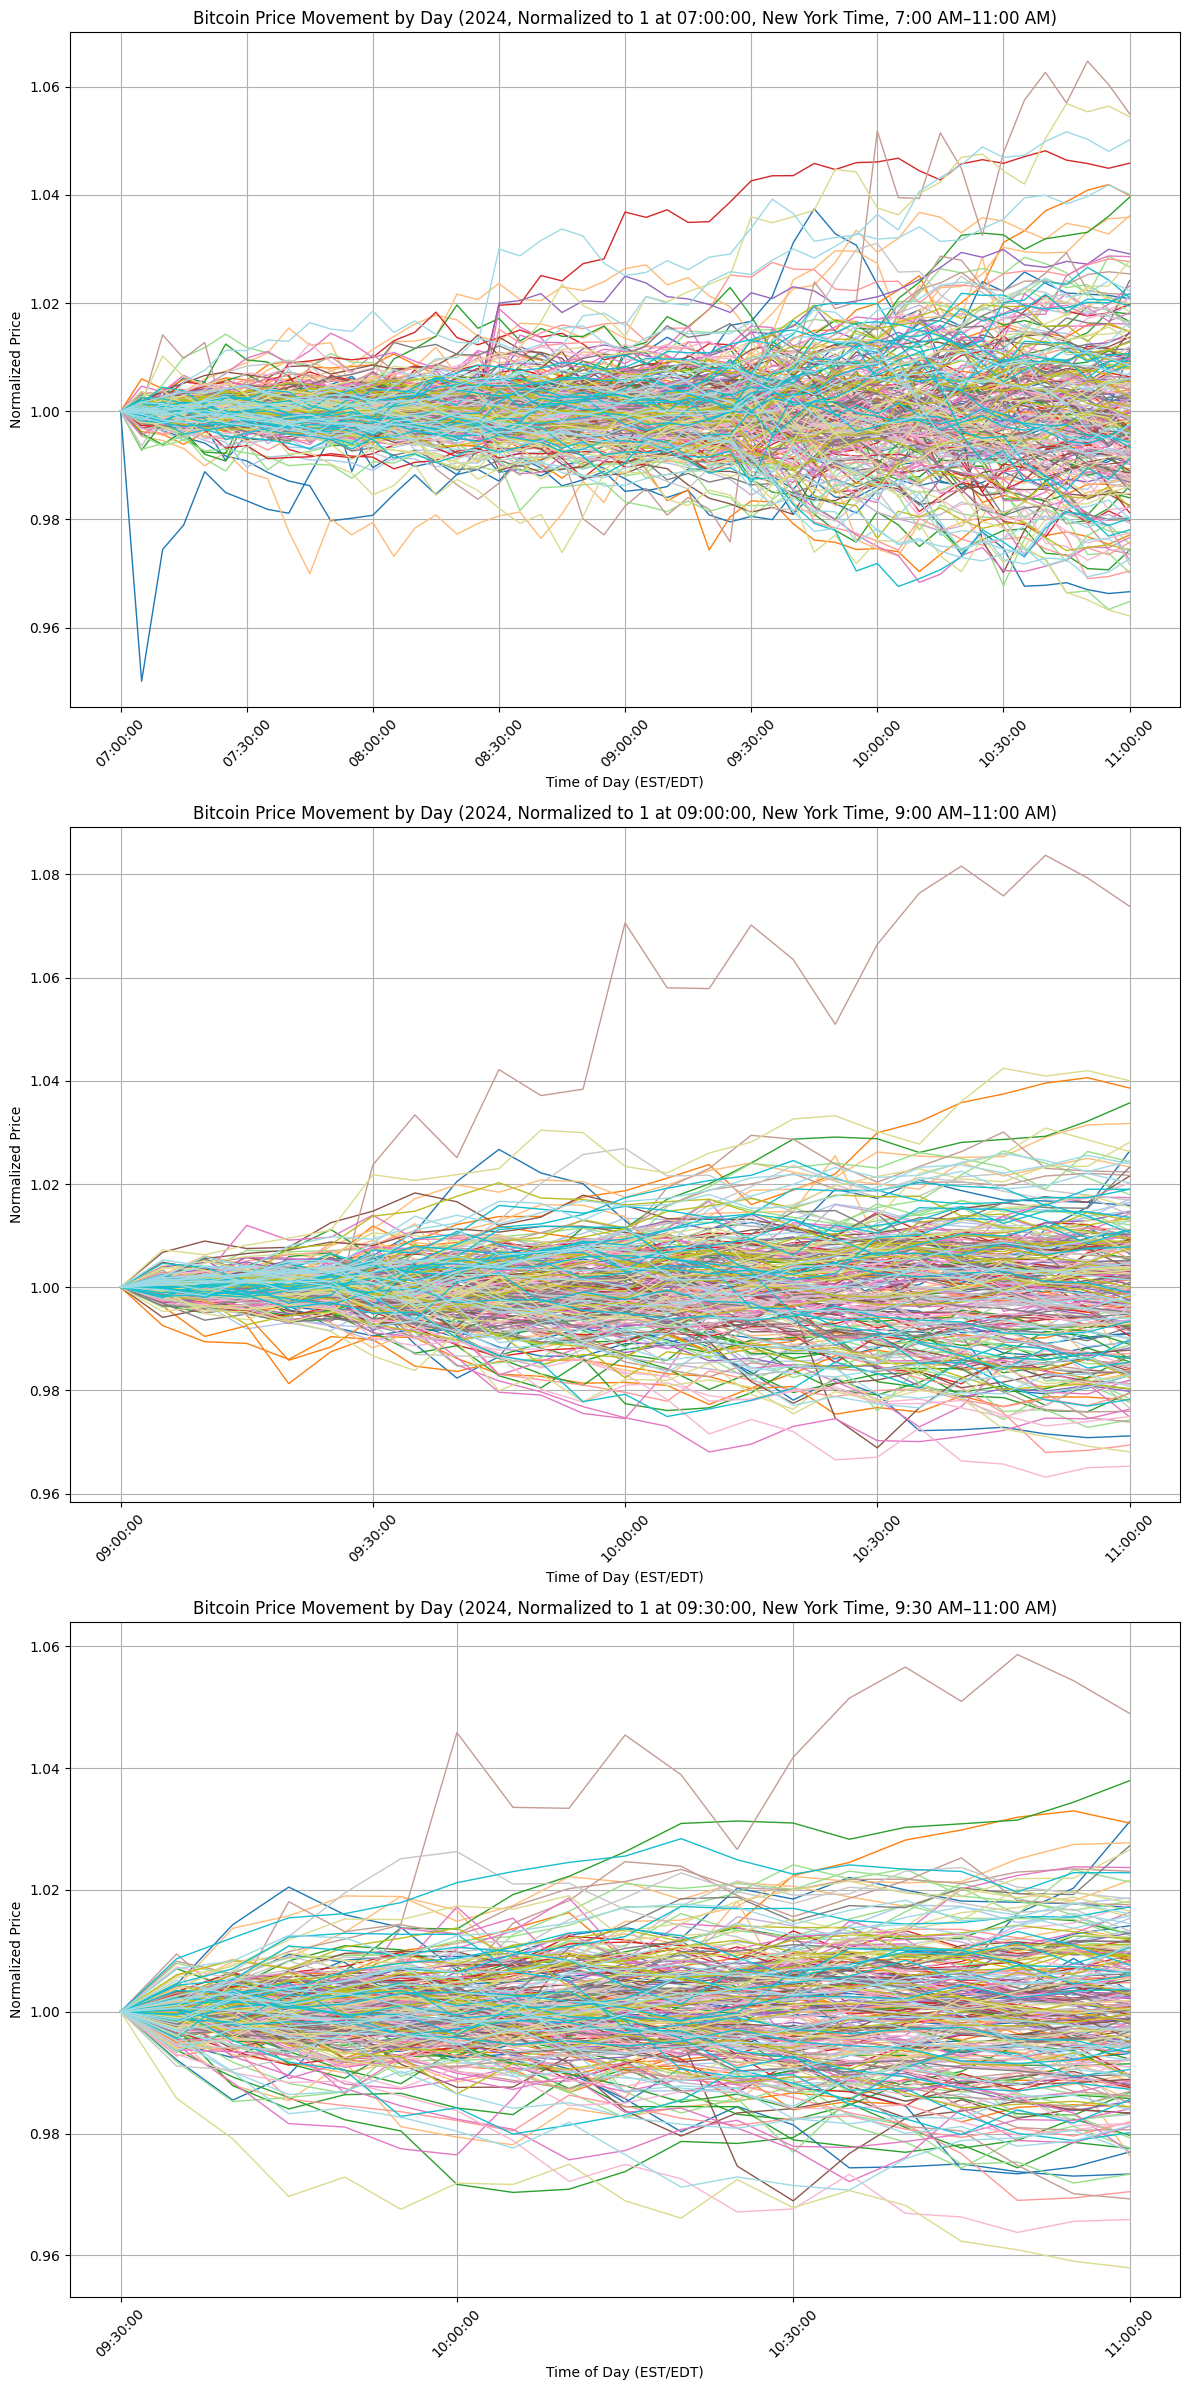

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load data (adjust path to your CSV file)
# Expected format: columns include 'timestamp' (UTC, e.g., '2024-01-01 00:00:00') and 'close' (price)
df = pd.read_csv('bitcoin_5min_coinbase_2024_data.csv')

# Convert timestamp to datetime and to New York time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_ny'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

# Extract date, time, and weekday
df['date'] = df['timestamp_ny'].dt.date
df['time'] = df['timestamp_ny'].dt.time
df['weekday'] = df['timestamp_ny'].dt.weekday

# Filter for weekdays (Monday=0, ..., Friday=4)
df = df[df['weekday'] < 5]

# Define time windows with consistent end time at 11:00 AM
time_windows = [
    {'start': '07:00:00', 'end': '11:00:00', 'label': '7:00 AM–11:00 AM'},
    {'start': '09:00:00', 'end': '11:00:00', 'label': '9:00 AM–11:00 AM'},
    {'start': '09:30:00', 'end': '11:00:00', 'label': '9:30 AM–11:00 AM'}
]

# Create a figure with subplots (one for each time window)
fig, axes = plt.subplots(len(time_windows), 1, figsize=(12, 8 * len(time_windows)), sharex=False)

# Ensure axes is a list for iteration, even with one subplot
if len(time_windows) == 1:
    axes = [axes]

# Process each time window
for ax, window in zip(axes, time_windows):
    start_time = pd.Timestamp(window['start']).time()
    end_time = pd.Timestamp(window['end']).time()
    
    # Filter for the current time window
    df_window = df[(df['time'] >= start_time) & (df['time'] <= end_time)].copy()
    
    # Normalize prices to 1 at the start time of each day
    start_prices = df_window[df_window['time'] == start_time][['date', 'close']].rename(columns={'close': 'start_price'})
    df_window = df_window.merge(start_prices, on='date', how='left')
    df_window['normalized_price'] = df_window['close'] / df_window['start_price']
    
    # Get unique dates
    unique_dates = df_window['date'].unique()
    
    # Plot each day separately
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_dates)))  # Distinct colors for each day
    for i, date in enumerate(unique_dates):
        day_df = df_window[df_window['date'] == date]
        ax.plot(day_df['time'].astype(str), day_df['normalized_price'], color=colors[i], linewidth=1)
    
    # Customize plot
    ax.set_title(f'Bitcoin Price Movement by Day (2024, Normalized to 1 at {window["start"]}, New York Time, {window["label"]})')
    ax.set_xlabel('Time of Day (EST/EDT)')
    ax.set_ylabel('Normalized Price')
    ax.grid(True)
    
    # Set x-axis ticks (every 30 minutes for clarity, assuming 5-min data)
    tick_indices = range(0, len(day_df['time']), 6)  # Every 6th point (~30 min)
    if len(day_df) > 0:  # Ensure there’s data to avoid indexing errors
        tick_labels = day_df['time'].iloc[tick_indices].astype(str)
        ax.set_xticks(tick_labels)
        ax.set_xticklabels(tick_labels, rotation=45)
    
    # Set y-axis range with slight buffer
    if not df_window['normalized_price'].empty:
        ax.set_ylim(df_window['normalized_price'].min() * 0.995, df_window['normalized_price'].max() * 1.005)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plots
plt.show()

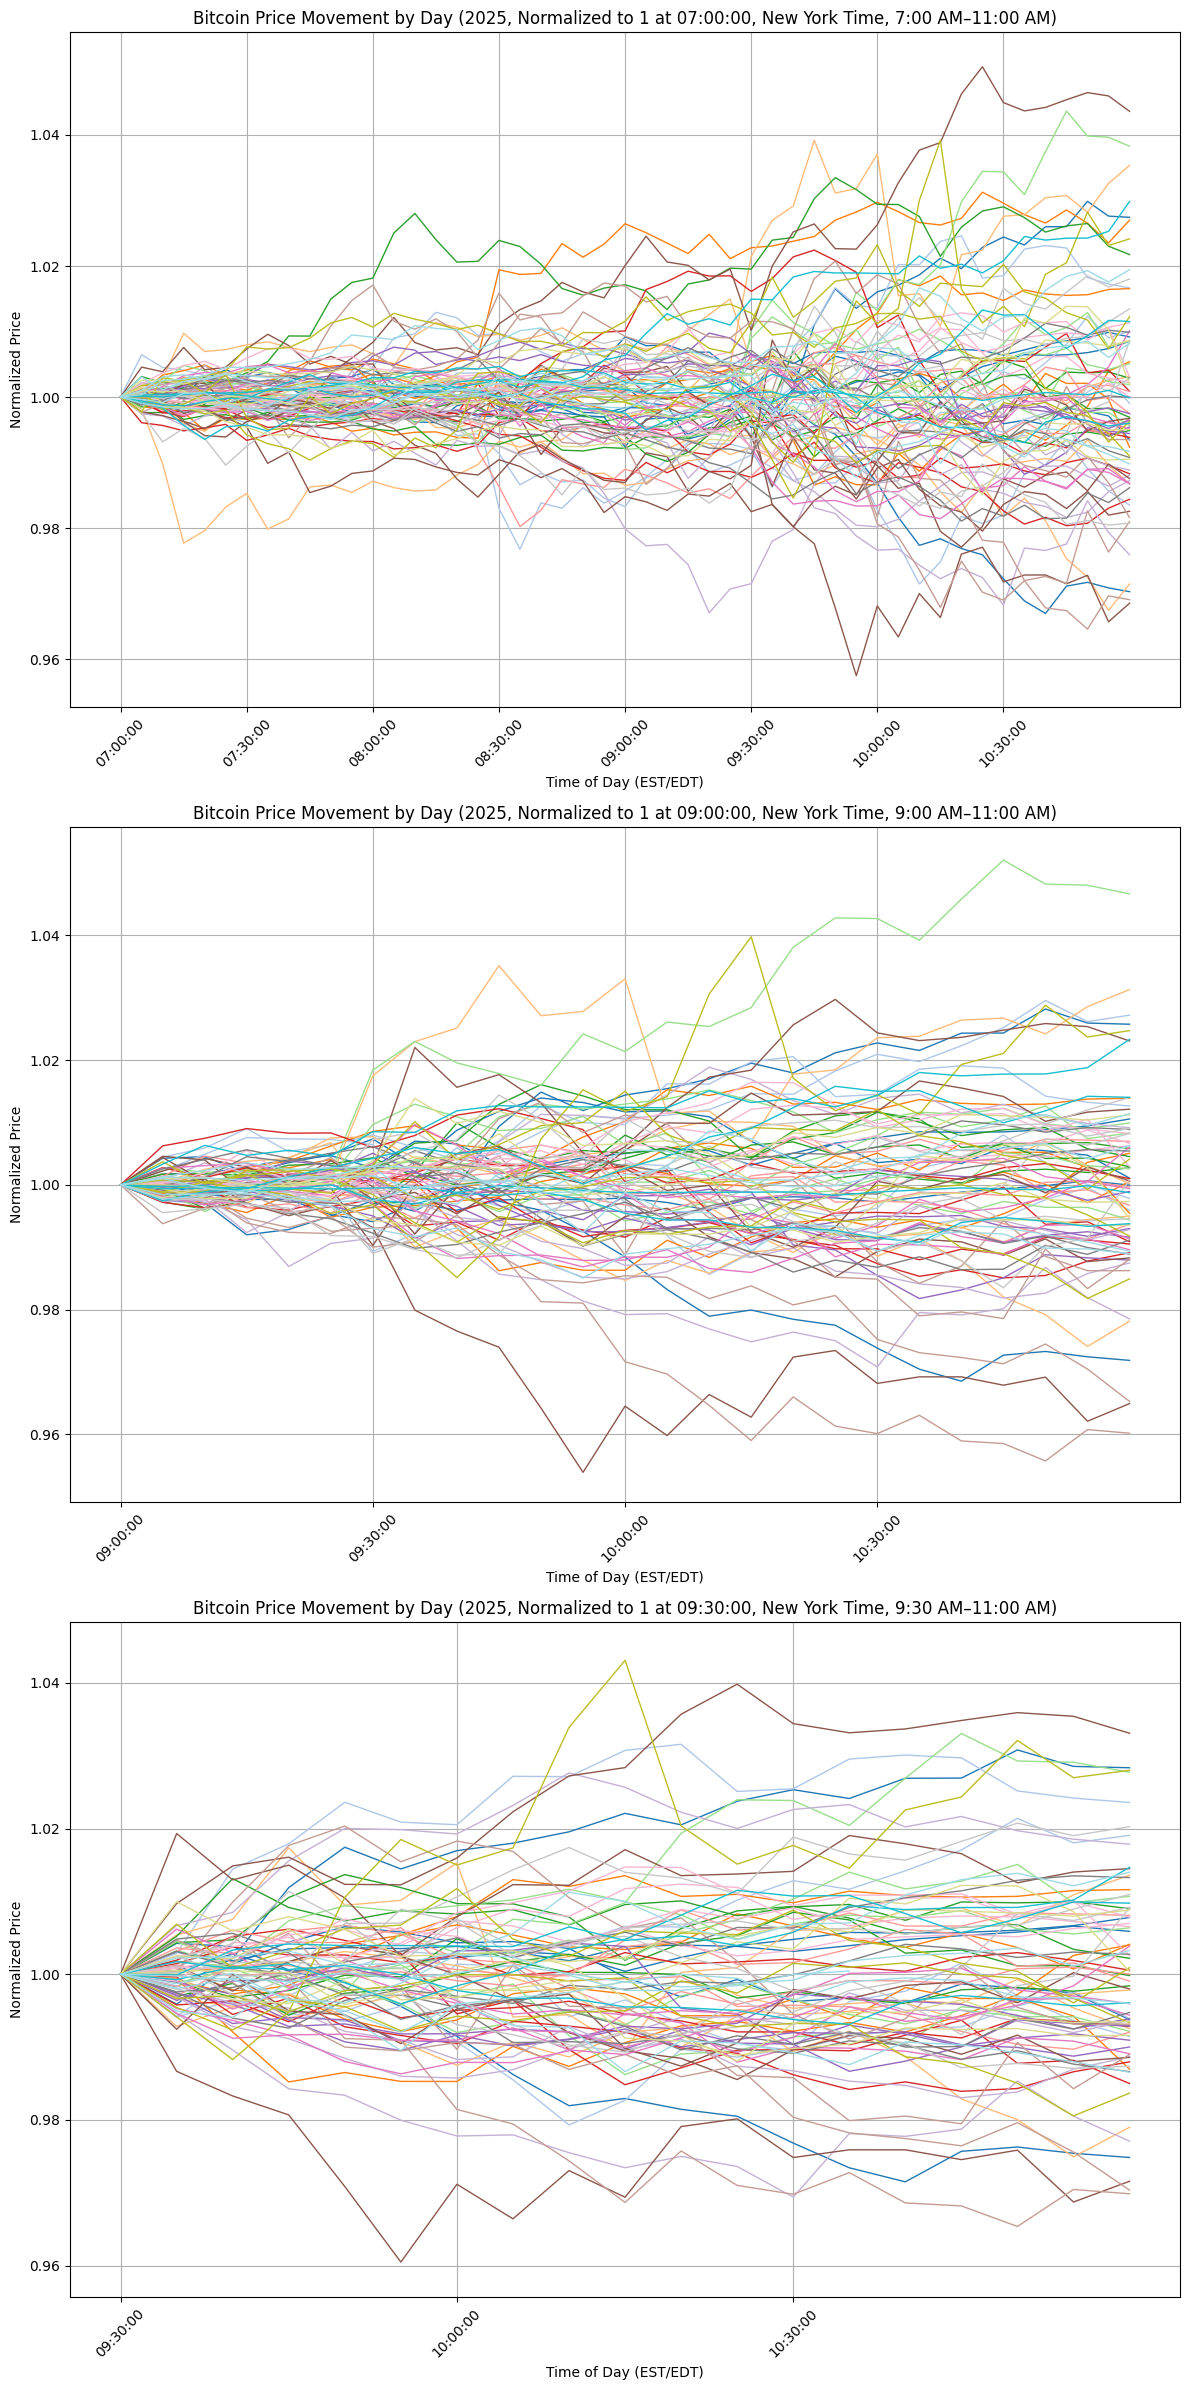

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load data (adjust path to your CSV file)
# Expected format: columns include 'timestamp' (UTC, e.g., '2024-01-01 00:00:00') and 'close' (price)
df = pd.read_csv('bitcoin_5min_coinbase_2025_data.csv')

# Convert timestamp to datetime and to New York time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_ny'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

# Extract date, time, and weekday
df['date'] = df['timestamp_ny'].dt.date
df['time'] = df['timestamp_ny'].dt.time
df['weekday'] = df['timestamp_ny'].dt.weekday

# Filter for weekdays (Monday=0, ..., Friday=4)
df = df[df['weekday'] < 5]

# Define time windows with consistent end time at 11:00 AM
time_windows = [
    {'start': '07:00:00', 'end': '11:00:00', 'label': '7:00 AM–11:00 AM'},
    {'start': '09:00:00', 'end': '11:00:00', 'label': '9:00 AM–11:00 AM'},
    {'start': '09:30:00', 'end': '11:00:00', 'label': '9:30 AM–11:00 AM'}
]

# Create a figure with subplots (one for each time window)
fig, axes = plt.subplots(len(time_windows), 1, figsize=(12, 8 * len(time_windows)), sharex=False)

# Ensure axes is a list for iteration, even with one subplot
if len(time_windows) == 1:
    axes = [axes]

# Process each time window
for ax, window in zip(axes, time_windows):
    start_time = pd.Timestamp(window['start']).time()
    end_time = pd.Timestamp(window['end']).time()
    
    # Filter for the current time window
    df_window = df[(df['time'] >= start_time) & (df['time'] <= end_time)].copy()
    
    # Normalize prices to 1 at the start time of each day
    start_prices = df_window[df_window['time'] == start_time][['date', 'close']].rename(columns={'close': 'start_price'})
    df_window = df_window.merge(start_prices, on='date', how='left')
    df_window['normalized_price'] = df_window['close'] / df_window['start_price']
    
    # Get unique dates
    unique_dates = df_window['date'].unique()
    
    # Plot each day separately
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_dates)))  # Distinct colors for each day
    for i, date in enumerate(unique_dates):
        day_df = df_window[df_window['date'] == date]
        ax.plot(day_df['time'].astype(str), day_df['normalized_price'], color=colors[i], linewidth=1)
    
    # Customize plot
    ax.set_title(f'Bitcoin Price Movement by Day (2025, Normalized to 1 at {window["start"]}, New York Time, {window["label"]})')
    ax.set_xlabel('Time of Day (EST/EDT)')
    ax.set_ylabel('Normalized Price')
    ax.grid(True)
    
    # Set x-axis ticks (every 30 minutes for clarity, assuming 5-min data)
    tick_indices = range(0, len(day_df['time']), 6)  # Every 6th point (~30 min)
    if len(day_df) > 0:  # Ensure there’s data to avoid indexing errors
        tick_labels = day_df['time'].iloc[tick_indices].astype(str)
        ax.set_xticks(tick_labels)
        ax.set_xticklabels(tick_labels, rotation=45)
    
    # Set y-axis range with slight buffer
    if not df_window['normalized_price'].empty:
        ax.set_ylim(df_window['normalized_price'].min() * 0.995, df_window['normalized_price'].max() * 1.005)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plots
plt.show()

**Histograms**

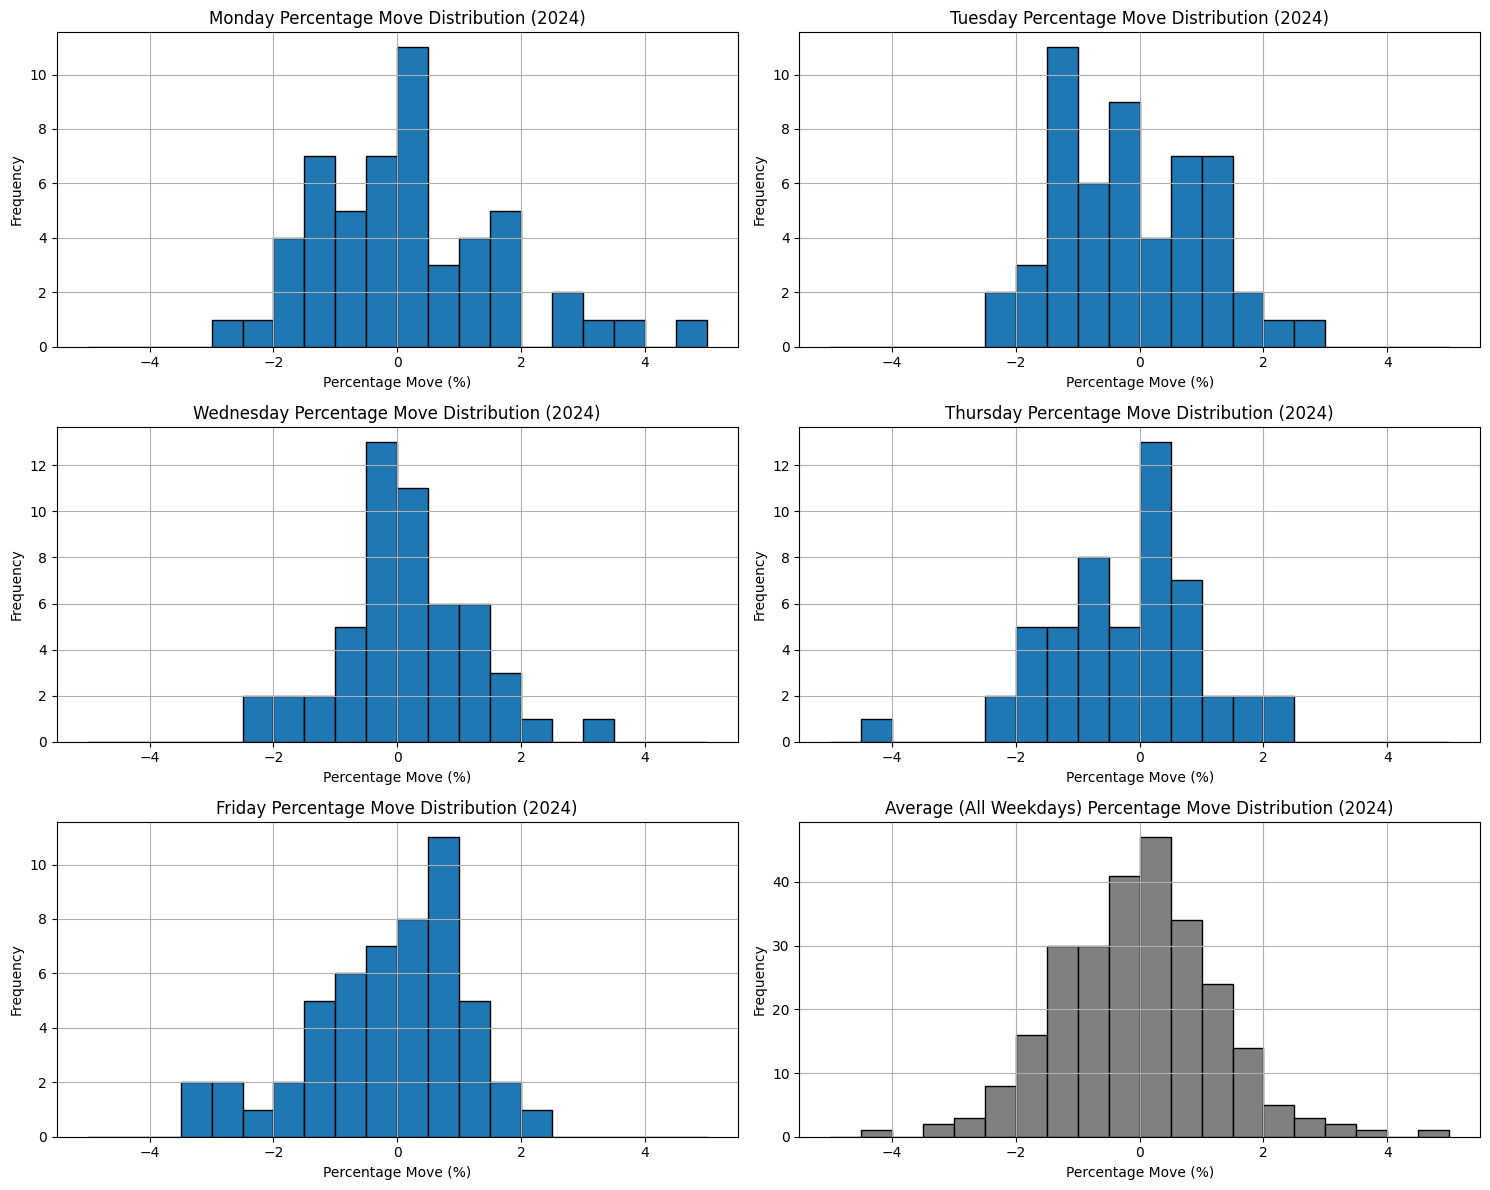

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

# Load data (adjust path to your CSV file)
# Expected format: columns include 'timestamp' (UTC, e.g., '2024-01-01 00:00:00') and 'close' (price)
df = pd.read_csv('bitcoin_5min_coinbase_2024_data.csv')

# Convert timestamp to datetime and to New York time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_ny'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

# Extract date, time, and weekday
df['date'] = df['timestamp_ny'].dt.date
df['time'] = df['timestamp_ny'].dt.time
df['weekday'] = df['timestamp_ny'].dt.weekday

# Filter for weekdays (Monday=0, ..., Friday=4)
df = df[df['weekday'] < 5]

# Filter for 9:30 AM to 11:00 AM
start_time = pd.Timestamp('09:30:00').time()
end_time = pd.Timestamp('11:00:00').time()
df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Normalize prices to 1 at 9:30 AM each day
start_prices = df[df['time'] == start_time][['date', 'close']].rename(columns={'close': 'start_price'})
df = df.merge(start_prices, on='date', how='left')
df['normalized_price'] = df['close'] / df['start_price']

# Calculate percentage move from 9:30 AM to 11:00 AM for each day
daily_moves = df[df['time'] == end_time][['date', 'weekday', 'normalized_price']].rename(columns={'normalized_price': 'end_price'})
daily_moves['percent_move'] = (daily_moves['end_price'] - 1) * 100  # Convert to percentage

# Define weekday names and add 'Average' for all weekdays
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 'average': 'Average (All Weekdays)'}

# Create bins for percentage moves (e.g., -5% to 5% in 0.5% increments)
bins = np.arange(-5, 5.5, 0.5)  # From -5% to 5% with 0.5% steps
bin_labels = [f"{x:.1f}%" for x in bins[:-1]]  # Labels for bins

# Initialize a dictionary to store histogram counts for each weekday and average
hist_data = {weekday_names[i]: np.histogram(daily_moves[daily_moves['weekday'] == i]['percent_move'], bins=bins)[0] for i in range(5)}
# Add average across all weekdays
hist_data[weekday_names['average']] = np.histogram(daily_moves['percent_move'], bins=bins)[0]

# Create a DataFrame for statistics
stats_df = pd.DataFrame(hist_data, index=bin_labels)

# Plot histograms for each weekday and average
plt.figure(figsize=(15, 12))
for i, (name, counts) in enumerate(hist_data.items()):
    plt.subplot(3, 2, i + 1)
    if name == 'Average (All Weekdays)':
        plt.hist(daily_moves['percent_move'], bins=bins, edgecolor='black', color='gray')
    else:
        plt.hist(daily_moves[daily_moves['weekday'] == list(weekday_names.keys())[i]]['percent_move'], bins=bins, edgecolor='black')
    plt.title(f'{name} Percentage Move Distribution (2024)')
    plt.xlabel('Percentage Move (%)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()

# Display the plot
plt.show()

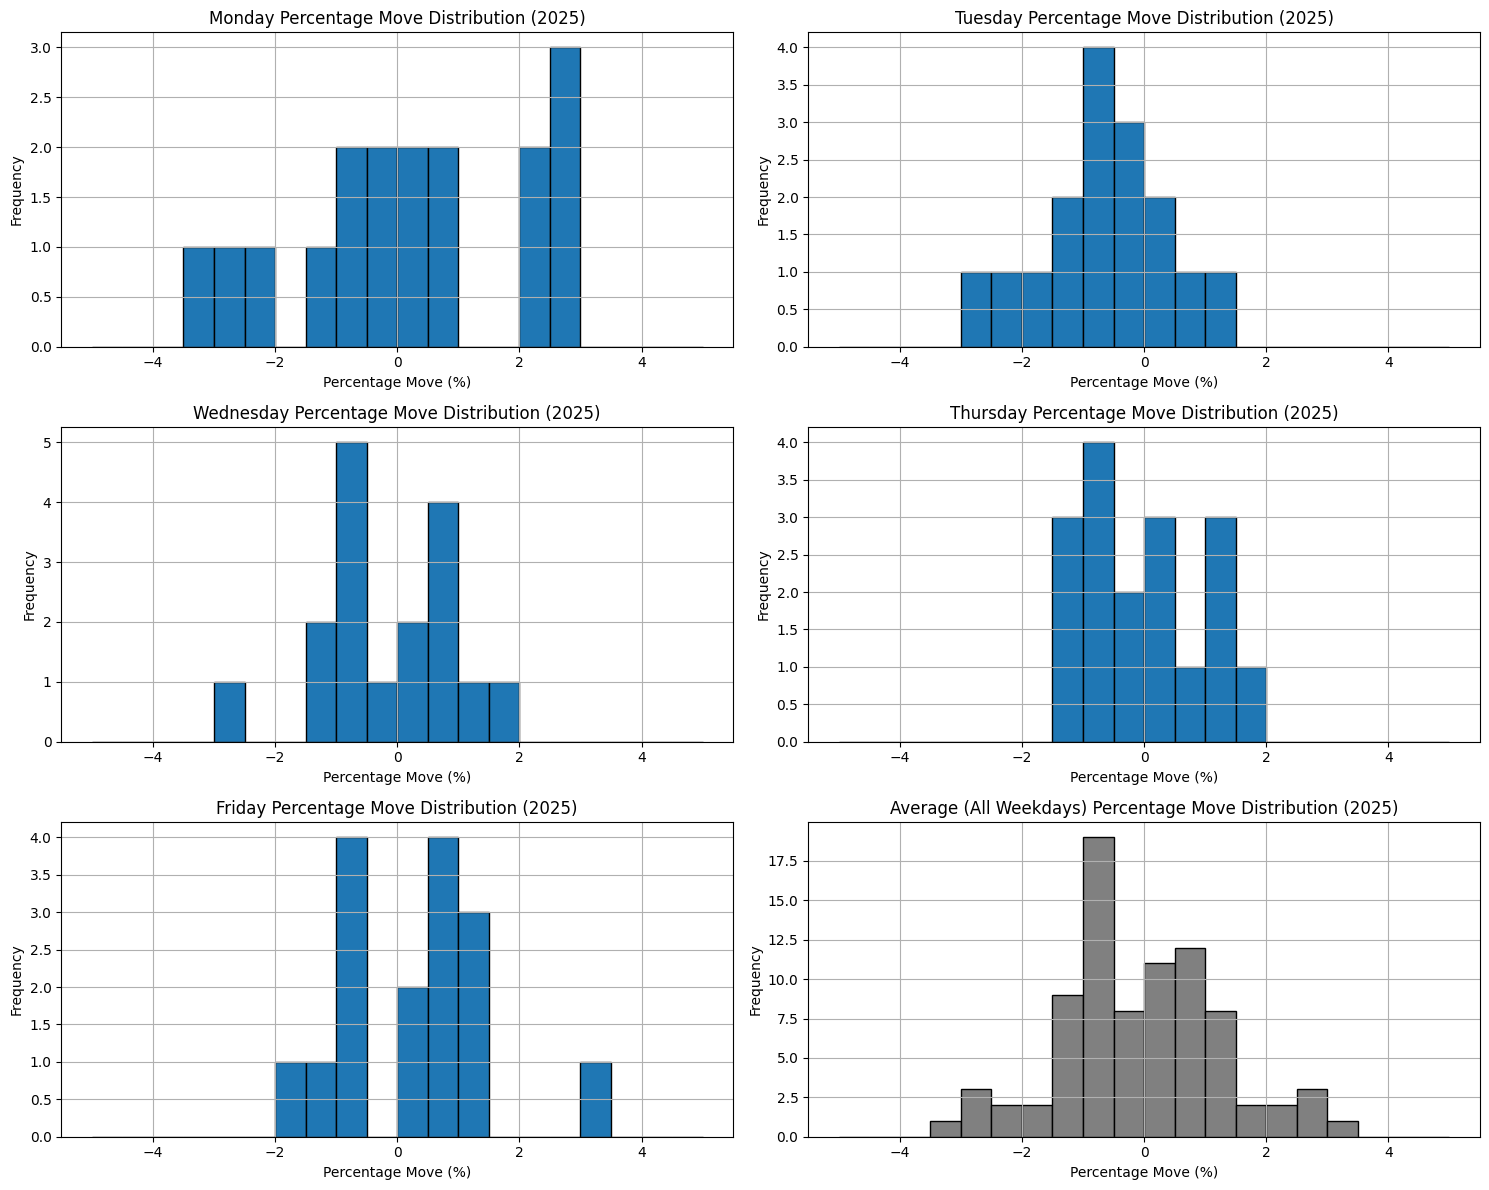

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

# Load data (adjust path to your CSV file)
# Expected format: columns include 'timestamp' (UTC, e.g., '2024-01-01 00:00:00') and 'close' (price)
df = pd.read_csv('bitcoin_5min_coinbase_2025_data.csv')

# Convert timestamp to datetime and to New York time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_ny'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

# Extract date, time, and weekday
df['date'] = df['timestamp_ny'].dt.date
df['time'] = df['timestamp_ny'].dt.time
df['weekday'] = df['timestamp_ny'].dt.weekday

# Filter for weekdays (Monday=0, ..., Friday=4)
df = df[df['weekday'] < 5]

# Filter for 9:30 AM to 11:00 AM
start_time = pd.Timestamp('09:30:00').time()
end_time = pd.Timestamp('11:00:00').time()
df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Normalize prices to 1 at 9:30 AM each day
start_prices = df[df['time'] == start_time][['date', 'close']].rename(columns={'close': 'start_price'})
df = df.merge(start_prices, on='date', how='left')
df['normalized_price'] = df['close'] / df['start_price']

# Calculate percentage move from 9:30 AM to 11:00 AM for each day
daily_moves = df[df['time'] == end_time][['date', 'weekday', 'normalized_price']].rename(columns={'normalized_price': 'end_price'})
daily_moves['percent_move'] = (daily_moves['end_price'] - 1) * 100  # Convert to percentage

# Define weekday names and add 'Average' for all weekdays
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 'average': 'Average (All Weekdays)'}

# Create bins for percentage moves (e.g., -5% to 5% in 0.5% increments)
bins = np.arange(-5, 5.5, 0.5)  # From -5% to 5% with 0.5% steps
bin_labels = [f"{x:.1f}%" for x in bins[:-1]]  # Labels for bins

# Initialize a dictionary to store histogram counts for each weekday and average
hist_data = {weekday_names[i]: np.histogram(daily_moves[daily_moves['weekday'] == i]['percent_move'], bins=bins)[0] for i in range(5)}
# Add average across all weekdays
hist_data[weekday_names['average']] = np.histogram(daily_moves['percent_move'], bins=bins)[0]

# Create a DataFrame for statistics
stats_df = pd.DataFrame(hist_data, index=bin_labels)

# Plot histograms for each weekday and average
plt.figure(figsize=(15, 12))
for i, (name, counts) in enumerate(hist_data.items()):
    plt.subplot(3, 2, i + 1)
    if name == 'Average (All Weekdays)':
        plt.hist(daily_moves['percent_move'], bins=bins, edgecolor='black', color='gray')
    else:
        plt.hist(daily_moves[daily_moves['weekday'] == list(weekday_names.keys())[i]]['percent_move'], bins=bins, edgecolor='black')
    plt.title(f'{name} Percentage Move Distribution (2025)')
    plt.xlabel('Percentage Move (%)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()


# Display the plot
plt.show()